In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [2]:
#loading the dataset
mnist = keras.datasets.mnist

In [3]:
#getting the training and testing dataset
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [4]:
#checking the length and shape of our training and testing datasets
print('length of X_train:',len(X_train))
print('length of X_test:',len(X_test))
print('shape of X_train:',X_train.shape)
print('shape of y_train:',y_train.shape)


length of X_train: 60000
length of X_test: 10000
shape of X_train: (60000, 28, 28)
shape of y_train: (60000,)


In [5]:
#printing the y_train
print(y_train)

[5 0 4 ... 5 6 8]


In [6]:
#printing y_train
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

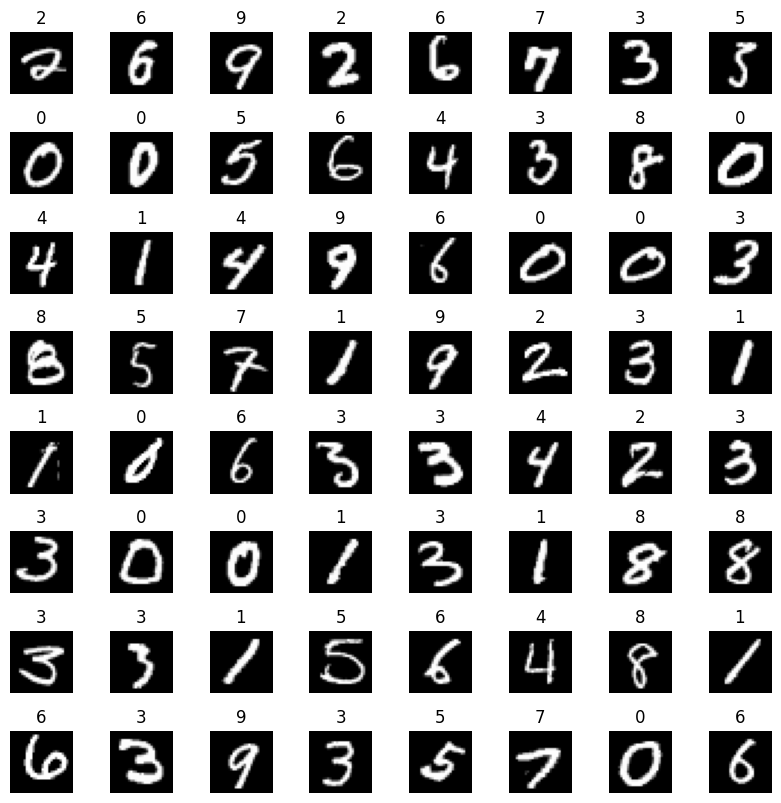

In [7]:
#showing how our dataset looks
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n, p = X_train.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    ax.imshow(X_train[random_index], cmap='gray')
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [8]:
#preprocessing our dataset
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [9]:
#checking the number of categories
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
10


In [10]:
#importing necessary libraries for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
#creating our neural network model
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(0.001),)
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.3040
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2088
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1692
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1430
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1389
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1187
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1045
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0977
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0886
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0787


In [13]:
#making predictions
pred = model.predict(X_test)
predictions = []
for i in range(len(y_test)):
  predictions.append(np.argmax(pred[i]))
print('y_test : ',y_test)
print('predictions : ',predictions)

313/313 [==============================] - 1s 3ms/step
y_test :  [7 2 1 ... 4 5 6]
predictions :  [7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 8, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4

In [14]:
#clculating accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)

97.18
